In [129]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('./train.tsv',delimiter='\t')

In [130]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [131]:
df['rev']=df['Sentiment'].apply(lambda x:'pos' if x>2 else 'neg')
df

,PhraseId,SentenceId,Phrase,Sentiment,rev
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,neg
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,neg
2,3,1,A series,2,neg
3,4,1,A,2,neg
4,5,1,series,2,neg
...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,neg
156056,156057,8544,forced avuncular chortles,1,neg
156057,156058,8544,avuncular chortles,3,pos
156058,156059,8544,avuncular,2,neg


In [132]:
df['lower']=df['Phrase'].apply(lambda x:x.lower())

In [133]:
df.drop(['PhraseId','SentenceId','Phrase'],axis=1,inplace=True)
df

,Sentiment,rev,lower
0,1,neg,"a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story ."
1,2,neg,a series of escapades demonstrating the adage that what is good for the goose
2,2,neg,a series
3,2,neg,a
4,2,neg,series
...,...,...,...
156055,2,neg,hearst 's
156056,1,neg,forced avuncular chortles
156057,3,pos,avuncular chortles
156058,2,neg,avuncular


In [134]:
df['lower']=df['lower'].str.replace("[^a-zA-Z#]", " ")

In [135]:
df

,Sentiment,rev,lower
0,1,neg,a series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story
1,2,neg,a series of escapades demonstrating the adage that what is good for the goose
2,2,neg,a series
3,2,neg,a
4,2,neg,series
...,...,...,...
156055,2,neg,hearst s
156056,1,neg,forced avuncular chortles
156057,3,pos,avuncular chortles
156058,2,neg,avuncular


In [136]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [137]:
df['lower']=df['lower'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop]))

In [138]:
df

,Sentiment,rev,lower
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
1,2,neg,series escapades demonstrating adage good goose
2,2,neg,series
3,2,neg,
4,2,neg,series
...,...,...,...
156055,2,neg,hearst
156056,1,neg,forced avuncular chortles
156057,3,pos,avuncular chortles
156058,2,neg,avuncular


In [139]:
df.drop_duplicates('lower',keep='first',inplace=True)

In [140]:
df

,Sentiment,rev,lower
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
1,2,neg,series escapades demonstrating adage good goose
2,2,neg,series
3,2,neg,
5,2,neg,escapades demonstrating adage good goose
...,...,...,...
156054,2,neg,hearst forced avuncular chortles
156056,1,neg,forced avuncular chortles
156057,3,pos,avuncular chortles
156058,2,neg,avuncular


In [141]:
df['lower']=df['lower'].apply(lambda x:x.split())

In [142]:
df

,Sentiment,rev,lower
0,1,neg,"[series, escapades, demonstrating, adage, good, goose, also, good, gander, occasionally, amuses, none, amounts, much, story]"
1,2,neg,"[series, escapades, demonstrating, adage, good, goose]"
2,2,neg,[series]
3,2,neg,[]
5,2,neg,"[escapades, demonstrating, adage, good, goose]"
...,...,...,...
156054,2,neg,"[hearst, forced, avuncular, chortles]"
156056,1,neg,"[forced, avuncular, chortles]"
156057,3,pos,"[avuncular, chortles]"
156058,2,neg,[avuncular]


In [143]:
df['lower']=df['lower'].apply(lambda x:'NaN' if len(x)<3 else x)
df

,Sentiment,rev,lower
0,1,neg,"[series, escapades, demonstrating, adage, good, goose, also, good, gander, occasionally, amuses, none, amounts, much, story]"
1,2,neg,"[series, escapades, demonstrating, adage, good, goose]"
2,2,neg,NaN
3,2,neg,NaN
5,2,neg,"[escapades, demonstrating, adage, good, goose]"
...,...,...,...
156054,2,neg,"[hearst, forced, avuncular, chortles]"
156056,1,neg,"[forced, avuncular, chortles]"
156057,3,pos,NaN
156058,2,neg,NaN


In [144]:
df = df[df['lower']!='NaN']
df

,Sentiment,rev,lower
0,1,neg,"[series, escapades, demonstrating, adage, good, goose, also, good, gander, occasionally, amuses, none, amounts, much, story]"
1,2,neg,"[series, escapades, demonstrating, adage, good, goose]"
5,2,neg,"[escapades, demonstrating, adage, good, goose]"
9,2,neg,"[demonstrating, adage, good, goose]"
27,2,neg,"[also, good, gander, occasionally, amuses, none, amounts, much, story]"
...,...,...,...
156048,2,neg,"[suggesting, sadness, obsession, beneath, hearst, forced, avuncular, chortles]"
156049,2,neg,"[suggesting, sadness, obsession]"
156053,2,neg,"[beneath, hearst, forced, avuncular, chortles]"
156054,2,neg,"[hearst, forced, avuncular, chortles]"


In [145]:
df['lower']=df['lower'].apply(lambda x: ' '.join([w for w in x if len(w)>3]))
df.drop_duplicates('lower',keep='first',inplace=True)
df

,Sentiment,rev,lower
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
1,2,neg,series escapades demonstrating adage good goose
5,2,neg,escapades demonstrating adage good goose
9,2,neg,demonstrating adage good goose
27,2,neg,also good gander occasionally amuses none amounts much story
...,...,...,...
156048,2,neg,suggesting sadness obsession beneath hearst forced avuncular chortles
156049,2,neg,suggesting sadness obsession
156053,2,neg,beneath hearst forced avuncular chortles
156054,2,neg,hearst forced avuncular chortles


In [146]:
pd.options.display.max_colwidth = 200
df

,Sentiment,rev,lower
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
1,2,neg,series escapades demonstrating adage good goose
5,2,neg,escapades demonstrating adage good goose
9,2,neg,demonstrating adage good goose
27,2,neg,also good gander occasionally amuses none amounts much story
...,...,...,...
156048,2,neg,suggesting sadness obsession beneath hearst forced avuncular chortles
156049,2,neg,suggesting sadness obsession
156053,2,neg,beneath hearst forced avuncular chortles
156054,2,neg,hearst forced avuncular chortles


In [147]:
df['sentiment']=df['Sentiment'].apply(lambda x:1 if x>2 else 0)

In [148]:
df

,Sentiment,rev,lower,sentiment
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0
1,2,neg,series escapades demonstrating adage good goose,0
5,2,neg,escapades demonstrating adage good goose,0
9,2,neg,demonstrating adage good goose,0
27,2,neg,also good gander occasionally amuses none amounts much story,0
...,...,...,...,...
156048,2,neg,suggesting sadness obsession beneath hearst forced avuncular chortles,0
156049,2,neg,suggesting sadness obsession,0
156053,2,neg,beneath hearst forced avuncular chortles,0
156054,2,neg,hearst forced avuncular chortles,0


In [149]:
df.rename(columns = {'lower':'Cleaned_Reviews'}, inplace = True)

In [150]:
df.rename(columns = {'sentiment':'Sentiment_0_or_1'}, inplace = True)


In [151]:
df.head(20)

,Sentiment,rev,Cleaned_Reviews,Sentiment_0_or_1
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0
1,2,neg,series escapades demonstrating adage good goose,0
5,2,neg,escapades demonstrating adage good goose,0
9,2,neg,demonstrating adage good goose,0
27,2,neg,also good gander occasionally amuses none amounts much story,0
31,2,neg,good gander occasionally amuses none amounts much story,0
32,2,neg,gander occasionally amuses none amounts much story,0
38,2,neg,occasionally amuses none amounts much story,0
45,2,neg,amuses none amounts much story,0
47,1,neg,none amounts much story,0


In [152]:
# #we will not use stemming because it just cutsoff the word without seeing the context
# from nltk import PorterStemmer
# ps=PorterStemmer()
# df['Cleaned_Reviews']=df['Cleaned_Reviews'].apply(lambda x:' '.join([ps.stem(word) for word in x.split()]))

In [153]:
df

,Sentiment,rev,Cleaned_Reviews,Sentiment_0_or_1
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0
1,2,neg,series escapades demonstrating adage good goose,0
5,2,neg,escapades demonstrating adage good goose,0
9,2,neg,demonstrating adage good goose,0
27,2,neg,also good gander occasionally amuses none amounts much story,0
...,...,...,...,...
156048,2,neg,suggesting sadness obsession beneath hearst forced avuncular chortles,0
156049,2,neg,suggesting sadness obsession,0
156053,2,neg,beneath hearst forced avuncular chortles,0
156054,2,neg,hearst forced avuncular chortles,0


## we have cleaned dataset and removed almost 90k useless reviews 

In [154]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [155]:
all_words_positive = ' '.join(text for text in df['Cleaned_Reviews'][df['Sentiment_0_or_1']==1])


In [156]:
# combining the image with the dataset
import numpy as np
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

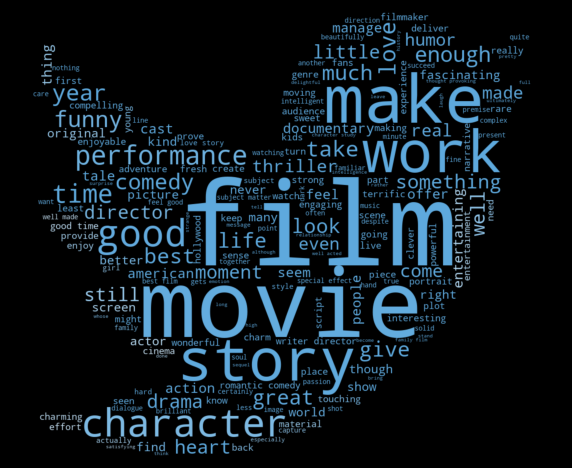

In [157]:
import re
import matplotlib.pyplot as plt 
import seaborn as sns
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [158]:
all_words_negative = ' '.join(text for text in df['Cleaned_Reviews'][df['Sentiment_0_or_1']==0])


In [159]:
# combining the image with the dataset
import numpy as np
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

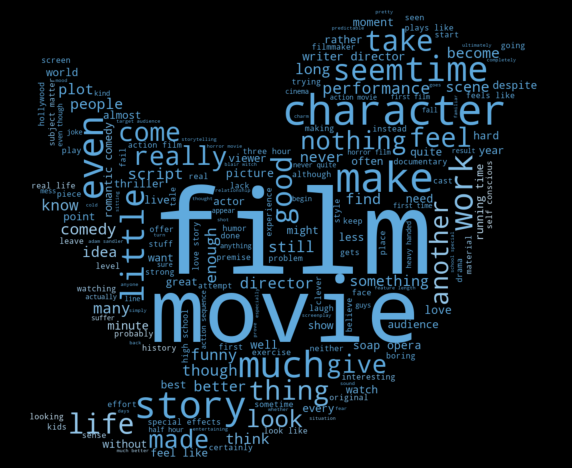

In [160]:
import re
import matplotlib.pyplot as plt 
import seaborn as sns
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [161]:
import nltk
word_freq_positive = nltk.FreqDist(all_words_positive.split())

word_freq_positive

FreqDist({'film': 1389, 'movie': 903, 'good': 517, 'story': 443, 'well': 411, 'funny': 406, 'like': 396, 'life': 360, 'comedy': 358, 'best': 326, ...})

In [162]:
word_freq_negative = nltk.FreqDist(all_words_negative.split())

word_freq_negative

FreqDist({'movie': 1916, 'film': 1877, 'like': 1350, 'story': 752, 'much': 628, 'time': 624, 'even': 585, 'characters': 568, 'little': 512, 'comedy': 507, ...})

In [163]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [164]:
df['Sentiment_0_or_1'].value_counts()


0    30623
1    15273
Name: Sentiment_0_or_1, dtype: int64

In [165]:
df['scores']=df['Cleaned_Reviews'].apply(lambda review : sid.polarity_scores(review))

In [166]:
df.head(20)

,Sentiment,rev,Cleaned_Reviews,Sentiment_0_or_1,scores
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.8024}"
1,2,neg,series escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}"
5,2,neg,escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}"
9,2,neg,demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}"
27,2,neg,also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6494}"
31,2,neg,good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6494}"
32,2,neg,gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.3415}"
38,2,neg,occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.3415}"
45,2,neg,amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}"
47,1,neg,none amounts much story,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [167]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Sentiment,rev,Cleaned_Reviews,Sentiment_0_or_1,scores,compound
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.8024}",0.8024
1,2,neg,series escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}",0.4404
5,2,neg,escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}",0.4404
9,2,neg,demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}",0.4404
27,2,neg,also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6494}",0.6494


In [168]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head(20)

,Sentiment,rev,Cleaned_Reviews,Sentiment_0_or_1,scores,compound,comp_score
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.8024}",0.8024,pos
1,2,neg,series escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}",0.4404,pos
5,2,neg,escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}",0.4404,pos
9,2,neg,demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}",0.4404,pos
27,2,neg,also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6494}",0.6494,pos
31,2,neg,good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6494}",0.6494,pos
32,2,neg,gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.3415}",0.3415,pos
38,2,neg,occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.3415}",0.3415,pos
45,2,neg,amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}",0.4019,pos
47,1,neg,none amounts much story,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos


In [169]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df['rev'],df['comp_score'])

0.4698884434373366

In [170]:
print(classification_report(df['rev'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.83      0.26      0.39     30623
         pos       0.38      0.89      0.53     15273

    accuracy                           0.47     45896
   macro avg       0.60      0.58      0.46     45896
weighted avg       0.68      0.47      0.44     45896



In [171]:
from sklearn.model_selection import train_test_split

X = df['Cleaned_Reviews']  # this time we want to look at the text
y = df['Sentiment_0_or_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [172]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()

# X_train_counts = count_vect.fit_transform(X_train)
# X_train_counts.shape

In [173]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_train_tfidf.shape

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [175]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [176]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[8927 1169]
 [1712 3338]]


In [177]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     10096
           1       0.74      0.66      0.70      5050

    accuracy                           0.81     15146
   macro avg       0.79      0.77      0.78     15146
weighted avg       0.81      0.81      0.81     15146



In [178]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8097847616532418


In [179]:
prediction1 = text_clf.predict(['not good worst moview bad acting'])

In [180]:
prediction1

array([0], dtype=int64)

In [181]:
prediction2 = text_clf.predict(['good best movie worth watching'])
prediction2

array([1], dtype=int64)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [183]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [184]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[9474  622]
 [2421 2629]]


In [185]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     10096
           1       0.81      0.52      0.63      5050

    accuracy                           0.80     15146
   macro avg       0.80      0.73      0.75     15146
weighted avg       0.80      0.80      0.79     15146



In [186]:
prediction1 = text_clf.predict(['not good worst moview bad acting'])
prediction1

array([0], dtype=int64)

In [187]:
prediction2 = text_clf.predict(['good best movie worth watching'])
prediction2

array([1], dtype=int64)

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [189]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [190]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[9093 1003]
 [2002 3048]]


In [191]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     10096
           1       0.75      0.60      0.67      5050

    accuracy                           0.80     15146
   macro avg       0.79      0.75      0.76     15146
weighted avg       0.80      0.80      0.80     15146



In [192]:
prediction1 = text_clf.predict(['not good worst moview bad acting'])
prediction1

array([1], dtype=int64)

In [193]:
prediction2 = text_clf.predict(['good best movie worth watching'])
prediction2

array([1], dtype=int64)

In [214]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = df['Cleaned_Reviews']  # this time we want to look at the text
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
y_train = to_categorical(y_train)
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [215]:
predictions = text_clf.predict(X_test)

In [217]:
predictions

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [241]:
# predictions[0].argmax()
pred=[]
b=0
for i in predictions:
    pred.append(predictions[b].argmax())
    b+=1

In [240]:

from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[ 524  272  162   15    0]
 [1235  898 1114   76    1]
 [1268  466 3569  475   21]
 [1154   65 1136 1235  190]
 [ 474    6  132  422  236]]


In [242]:
# Print a classification report
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.11      0.54      0.19       973
           1       0.53      0.27      0.36      3324
           2       0.58      0.62      0.60      5799
           3       0.56      0.33      0.41      3780
           4       0.53      0.19      0.27      1270

    accuracy                           0.43     15146
   macro avg       0.46      0.39      0.37     15146
weighted avg       0.53      0.43      0.45     15146



In [272]:
score=text_clf.predict(['hard time sitting'])

In [273]:
score

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [274]:
score.argmax()

0

In [66]:
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# plt.style.use('dark_background')
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

Using TensorFlow backend.


In [71]:
# df.head(-20)

,Sentiment,rev,Cleaned_Reviews,Sentiment_0_or_1,scores,compound,comp_score
0,1,neg,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.8024}",0.8024,pos
1,2,neg,series escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}",0.4404,pos
5,2,neg,escapades demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}",0.4404,pos
9,2,neg,demonstrating adage good goose,0,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}",0.4404,pos
27,2,neg,also good gander occasionally amuses none amounts much story,0,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6494}",0.6494,pos
...,...,...,...,...,...,...,...
155992,1,neg,claustrophobic concept,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
155997,2,neg,despite annoyances capable clayburgh tambor really great anchoring characters emotional realities middle,0,"{'neg': 0.118, 'neu': 0.432, 'pos': 0.45, 'compound': 0.7303}",0.7303,pos
156001,3,pos,capable clayburgh tambor really great anchoring characters emotional realities middle,1,"{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.8221}",0.8221,pos
156003,2,neg,capable clayburgh tambor,0,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.3818}",0.3818,pos


max phrase len: 27


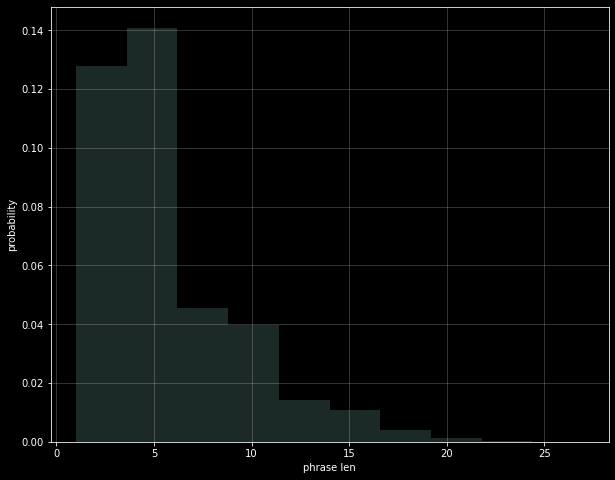

In [87]:
# from sklearn.model_selection import train_test_split

# X = df['Cleaned_Reviews']  # this time we want to look at the text
# y = df['Sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# phrase_len = X_train.apply(lambda p: len(p.split(' ')))
# max_phrase_len = phrase_len.max()
# print('max phrase len: {0}'.format(max_phrase_len))
# plt.figure(figsize = (10, 8))
# plt.hist(phrase_len, alpha = 0.2, density = True)
# plt.xlabel('phrase len')
# plt.ylabel('probability')
# plt.grid(alpha = 0.25)

In [88]:
# y_train

98658     4
25586     3
101991    1
150800    4
45872     0
         ..
43017     2
152392    2
131590    2
4013      1
58473     2
Name: Sentiment, Length: 30750, dtype: int64

In [89]:
# max_words = 8192
# tokenizer = Tokenizer(
#     num_words = max_words,
#     filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
# )
# tokenizer.fit_on_texts(X_train)
# X_train = tokenizer.texts_to_sequences(X_train)
# X_train = pad_sequences(X_train, maxlen = max_phrase_len)
# y_train = to_categorical(y_train)

In [90]:
# batch_size = 512
# epochs = 8

In [91]:
# model_lstm = Sequential()
# model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
# model_lstm.add(SpatialDropout1D(0.3))
# model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
# model_lstm.add(Dense(256, activation = 'relu'))
# model_lstm.add(Dropout(0.3))
# model_lstm.add(Dense(5, activation = 'softmax'))
# model_lstm.compile(
#     loss='categorical_crossentropy',
#     optimizer='Adam',
#     metrics=['accuracy']
# )


In [92]:
# history = model_lstm.fit(
#     X_train,
#     y_train,
#     validation_split = 0.1,
#     epochs = 8,
#     batch_size = 512
# )

Train on 27675 samples, validate on 3075 samples
Epoch 1/8
27675/27675 [==============================] - 30s 1ms/step - loss: 1.4221 - accuracy: 0.3880 - val_loss: 1.3725 - val_accuracy: 0.4046
Epoch 2/8
27675/27675 [==============================] - 31s 1ms/step - loss: 1.2384 - accuracy: 0.4821 - val_loss: 1.1788 - val_accuracy: 0.4881
Epoch 3/8
27675/27675 [==============================] - 32s 1ms/step - loss: 1.0151 - accuracy: 0.5828 - val_loss: 1.1377 - val_accuracy: 0.5086
Epoch 4/8
27675/27675 [==============================] - 32s 1ms/step - loss: 0.9153 - accuracy: 0.6254 - val_loss: 1.1385 - val_accuracy: 0.5050
Epoch 5/8
27675/27675 [==============================] - 31s 1ms/step - loss: 0.8612 - accuracy: 0.6446 - val_loss: 1.1668 - val_accuracy: 0.5073
Epoch 6/8
27675/27675 [==============================] - 31s 1ms/step - loss: 0.8145 - accuracy: 0.6666 - val_loss: 1.2260 - val_accuracy: 0.5067
Epoch 7/8
27675/27675 [==============================] - 32s 1ms/step - los

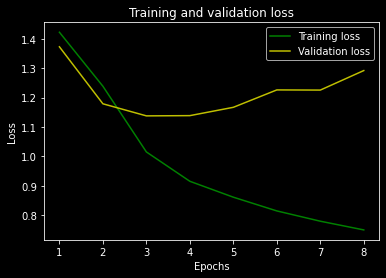

In [93]:
# plt.clf()
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'g', label='Training loss')
# plt.plot(epochs, val_loss, 'y', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

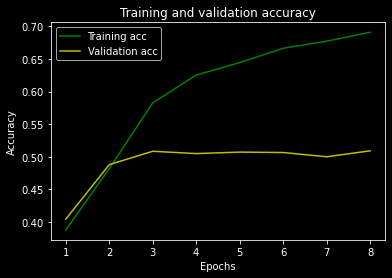

In [95]:
# plt.clf()
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'g', label='Training acc')
# plt.plot(epochs, val_acc, 'y', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [103]:
# model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 27, 256)           2097152   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 27, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
Total params: 2,689,541
Trainable params: 2,689,541
Non-trainable params: 0
____________________________________________

In [105]:
# max_words = 8192
# tokenizer = Tokenizer(
#     num_words = max_words,
#     filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
# )
# tokenizer.fit_on_texts(X_test)
# X_test = tokenizer.texts_to_sequences(X_test)
# X_test = pad_sequences(X_test, maxlen = max_phrase_len)
# y_test1 = to_categorical(y_test)

In [107]:
# pred_probabilities = model_lstm.predict(X_test)

In [108]:
# from sklearn.metrics import classification_report,confusion_matrix

In [120]:
# pred_probabilities

array([[9.8846285e-03, 5.6503028e-02, 2.8439420e-01, 5.2308965e-01,
        1.2612851e-01],
       [2.6869031e-03, 2.7259475e-01, 5.6250691e-01, 1.6195674e-01,
        2.5465069e-04],
       [1.1575905e-02, 2.1634161e-01, 3.4707838e-01, 3.8168052e-01,
        4.3323569e-02],
       ...,
       [9.0003549e-04, 9.7089047e-03, 8.4421641e-01, 1.4240365e-01,
        2.7709908e-03],
       [1.6030349e-04, 9.8412912e-03, 3.8206741e-01, 6.0343283e-01,
        4.4981404e-03],
       [1.0640770e-03, 3.6862543e-01, 4.6034837e-01, 1.6981265e-01,
        1.4947154e-04]], dtype=float32)

In [128]:
# 

In [121]:
# pred=[]
# for i in pred_probabilities:
#     pred.append(i.argmax())
    
    

In [122]:
pred

[3,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 0,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 3,
 4,
 2,
 1,
 3,
 3,
 4,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 3,
 3,
 0,
 2,
 1,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 4,
 2,
 3,
 1,
 2,
 2,
 1,
 4,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 1,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 4,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 0,
 2,


In [125]:
# y_test1

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [126]:
# y_test

84548     1
120844    2
78851     2
134384    2
72701     2
         ..
142379    3
144559    1
68908     2
10417     4
149135    3
Name: Sentiment, Length: 15146, dtype: int64

In [127]:
# print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.09      0.03      0.05       973
           1       0.23      0.23      0.23      3324
           2       0.44      0.53      0.48      5799
           3       0.27      0.29      0.28      3780
           4       0.12      0.05      0.07      1270

    accuracy                           0.33     15146
   macro avg       0.23      0.22      0.22     15146
weighted avg       0.30      0.33      0.31     15146

